<a href="https://colab.research.google.com/github/ektakarmakar-analyst/SCT_DS_3/blob/main/Bank__marketing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
510
20.import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/bank+marketing/bank/bank.csv', sep=';')
df2=pd.read_csv('/content/drive/MyDrive/bank+marketing/bank/bank-full.csv', sep=';')
df3=pd.read_csv('/content/drive/MyDrive/bank+marketing/bank-additional/bank-additional/bank-additional.csv',sep=';')
df4=pd.read_csv('/content/drive/MyDrive/bank+marketing/bank-additional/bank-additional/bank-additional-full.csv', sep=';')

In [ ]:
df1['source'] = 'bank'
df2['source'] = 'bank-full'
df3['source'] = 'bank-additional'
df4['source'] = 'bank-additional-full'

In [ ]:
common_cols = set(df1.columns) & set(df2.columns) & set(df3.columns) & set(df4.columns)

In [ ]:
df1 = df1[list(common_cols)]
df2 = df2[list(common_cols)]
df3 = df3[list(common_cols)]
df4 = df4[list(common_cols)]

In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [ ]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop('y', axis=1)
y = df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9004629629629629

📊 Confusion Matrix:
 [[24399   782]
 [ 2056  1275]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     25181
           1       0.62      0.38      0.47      3331

    accuracy                           0.90     28512
   macro avg       0.77      0.68      0.71     28512
weighted avg       0.89      0.90      0.89     28512



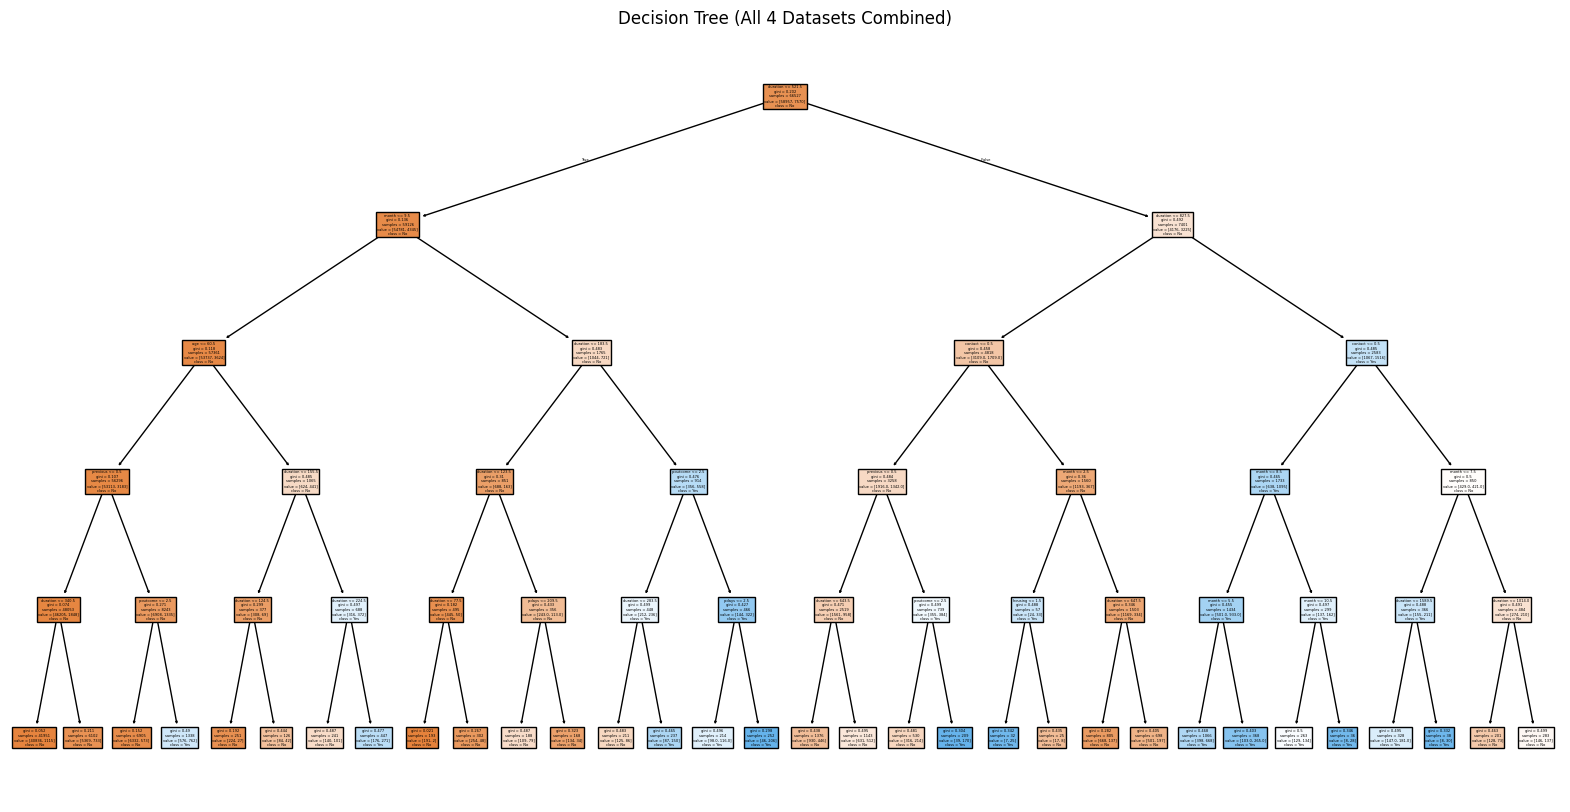

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree (All 4 Datasets Combined)")
plt.show()